## import needed packages

In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from easydict import EasyDict as edict
import scipy.stats as ss
import numpy.random as npr
from pprint import pprint
import pandas as pd
from collections import defaultdict as ddict

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Test the functions in PyMC3 package

### obtain data

In [30]:
NormRv = ss.norm(loc=2, scale=1)
Xs = NormRv.rvs(100)
mleX = Xs.mean()
varX = Xs.var() 
n = len(Xs)

### Build ordinary model

In [31]:
with pm.Model() as md:
    theta = pm.Normal("theta", mu=0, sigma=10)
    Sig2 = pm.InverseGamma("Sigma2", alpha=0.01, beta=0.01)
    X = pm.Normal("X", mu=theta, sigma=Sig2**(1/2), observed=Xs)
    trace = pm.sample(10000, tune=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Sigma2, theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:42<00:00, 1418.52draws/s]


In [32]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,1.993,0.099,1.805,2.176,0.001,0.000,33512.0,33381.0,33534.0,27615.0,1.0
Sigma2,0.973,0.140,0.729,1.238,0.001,0.001,31594.0,30546.0,32421.0,26691.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ee9307f0>,
      dtype=object)

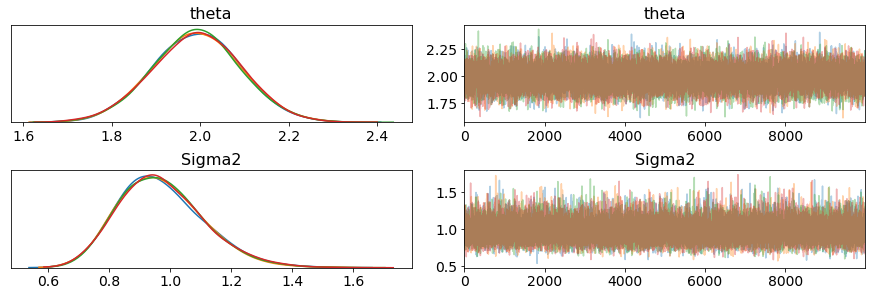

In [33]:
pm.traceplot(trace)

### Build model based on logp

In [57]:
with pm.Model() as md:
    theta = pm.Normal("theta", mu=0, sigma=10)
    Sig2 = pm.InverseGamma("Sigma2", alpha=0.01, beta=0.01)
    def tmpf(mlem, mlev):
        return -n/2 * np.log(Sig2) - n*mlev/2/Sig2 - n*(mlem-theta)**2/2/Sig2
    pm.DensityDist("Distdensity", tmpf, observed={"mlem":[mleX], "mlev":[varX]})
    tracelogp = pm.sample(10000, tune=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Sigma2, theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:54<00:00, 1096.72draws/s]


In [58]:
pm.summary(tracelogp)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,1.992,0.099,1.805,2.176,0.001,0.000,33862.0,33839.0,33806.0,27651.0,1.0
Sigma2,0.974,0.143,0.722,1.241,0.001,0.001,32681.0,31382.0,33999.0,27538.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d4378208>,
      dtype=object)

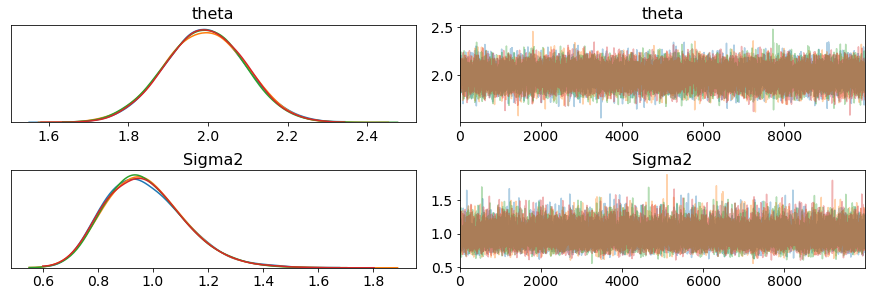

In [59]:
pm.traceplot(tracelogp)

In [40]:
with pm.Model() as md:
    theta = pm.Normal("theta", mu=0, sigma=10)
    Sig2 = pm.InverseGamma("Sigma2", alpha=0.01, beta=0.01)
    X = pm.Normal("X", mu=theta, sigma=Sig2**(1/2), observed=Xs)
    trace2 = pm.sample(10000, tune=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Sigma2, theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:43<00:00, 1377.19draws/s]


In [41]:
pm.summary(trace2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,1.991,0.099,1.804,2.174,0.001,0.000,32189.0,32183.0,32212.0,27790.0,1.0
Sigma2,0.973,0.141,0.719,1.237,0.001,0.001,32067.0,30955.0,32800.0,27592.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d62b1518>,
      dtype=object)

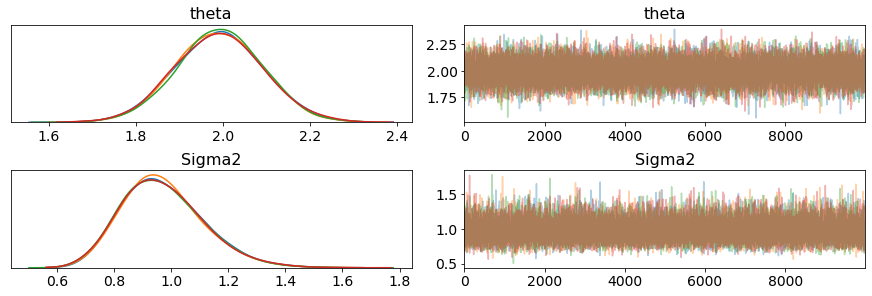

In [42]:
pm.traceplot(trace2)

## Real Data 

### the data 

In [3]:
dat1 = edict()
dat1.nivo = edict()
dat1.doce = edict()

dat1.nivo.n = 135
dat1.nivo.low = 7.3
dat1.nivo.up = 13.3
dat1.nivo.median = 9.2

dat1.doce.n = 137
dat1.doce.low = 5.1
dat1.doce.up = 7.3
dat1.doce.median = 6.0

In [4]:
dat2 = edict()
dat2.nivo = edict()
dat2.doce = edict()

dat2.nivo.n = 292
dat2.nivo.low = 9.7
dat2.nivo.up = 15.0
dat2.nivo.median = 12.2

dat2.doce.n = 290
dat2.doce.low = 8.1
dat2.doce.up = 10.7
dat2.doce.median = 9.4

In [5]:
dat3 = edict()
dat3.nivo = edict()
dat3.doce = edict()

dat3.nivo.n = 338
dat3.nivo.low = 10.4
dat3.nivo.up = 14.0
dat3.nivo.median = 12

dat3.doce.n = 166
dat3.doce.low = 7.6
dat3.doce.up = 11.2
dat3.doce.median = 9.6

`dat4` and `dat5` are **not** nivo-vs-doce data

In [6]:
dat4 = edict()
dat4.nivo = edict()
dat4.doce = edict()

dat4.nivo.n = 345
dat4.nivo.low = 9.4
dat4.nivo.up = 11.9
dat4.nivo.median = 10.4

dat4.doce.n = 343
dat4.doce.low = 7.5
dat4.doce.up = 9.8
dat4.doce.median = 8.5

In [7]:
dat5 = edict()
dat5.nivo = edict()
dat5.doce = edict()

dat5.nivo.n = 346
dat5.nivo.low = 10.0
dat5.nivo.up = 17.3
dat5.nivo.median = 12.7

dat5.doce.n = 343
dat5.doce.low = 7.5
dat5.doce.up = 9.8
dat5.doce.median = 8.5

### Raw model

In [8]:
from scipy.stats import norm, invgamma 

def sigma2cond_theta(theta, D):
    n = D.n
    shape = n/2
    scale = ((D.up - D.low)/2/1.96/np.sqrt(np.pi/2) * np.sqrt(n))**2*(n-1)/2
    return invgamma.rvs(a=shape, scale=scale, size=1)
    

def thetacond_sigma2(sigma2, D):
    n = D.n
    loc = (D.low + D.up)/2
    scale = np.sqrt(sigma2/n) 
    return norm.rvs(loc=loc, scale=scale, size=1)

def gen_post_jef(N, D, burnin=5000, thin=5, diag=False):
    thetas = []
    sigma2s = []
    ctheta = 0
    for i in range(N):
        csigma2 = sigma2cond_theta(ctheta, D=D)
        ctheta = thetacond_sigma2(csigma2, D=D)
        thetas.append(ctheta)
        sigma2s.append(csigma2)
    thetas, sigma2s = np.array(thetas), np.array(sigma2s)
    if diag:
        return {"theta": thetas, "sigma2": sigma2s}
    else:
        return {"theta": thetas[burnin::thin], "sigma2": sigma2s[burnin::thin]}

In [8]:
SamData1 = edict()
SamData1.nivo = gen_post_jef(25000, dat1.nivo)
SamData1.doce = gen_post_jef(25000, dat1.doce)

In [9]:
SamData2 = edict()
SamData2.nivo = gen_post_jef(25000, dat2.nivo)
SamData2.doce = gen_post_jef(25000, dat2.doce)

In [10]:
SamData3 = edict()
SamData3.nivo = gen_post_jef(25000, dat3.nivo)
SamData3.doce = gen_post_jef(25000, dat3.doce)

In [11]:
alldata = edict()
alldata.theta = np.concatenate([SamData1.nivo.theta, SamData1.doce.theta,
                              SamData2.nivo.theta,SamData2.doce.theta,
                              SamData3.nivo.theta,SamData3.doce.theta]).reshape(-1)
nums = len(SamData1.nivo.theta)
alldata.type = np.array(["nivo"]*nums + ["doce"]*nums + ["nivo"]*nums + ["doce"]*nums +["nivo"]*nums + ["doce"]*nums)
alldata.data = np.array(["data1"]*nums*2 + ["data2"]*nums*2 + ["data3"]*nums*2)

In [12]:
alldatadf = pd.DataFrame(alldata)
alldatagp = alldatadf.groupby(["data", "type"])

In [13]:
alldatagp.quantile([0.5, 0.025, 0.975])

theta
data  type                 
data1 doce 0.500   6.178373
           0.025   5.314250
           0.975   7.088498
      nivo 0.500  10.292411
           0.025   7.869433
           0.975  12.721842
data2 doce 0.500   9.392112
           0.025   8.358493
           0.975  10.447490
      nivo 0.500  12.336921
           0.025  10.226215
           0.975  14.451665
data3 doce 0.500   9.417697
           0.025   7.946059
           0.975  10.836357
      nivo 0.500  12.191875
           0.025  10.743716
           0.975  13.637745

In [14]:
alldatagp.std()

theta
data  type          
data1 doce  0.447897
      nivo  1.242336
data2 doce  0.530631
      nivo  1.078550
data3 doce  0.732658
      nivo  0.739933

## UIP model

In [9]:
def CI2Var(D):
    low = D.low
    up = D.up
    n = D.n
    var = ((up-low)/2/1.96/np.sqrt(np.pi/2)*np.sqrt(n))**2*(n-1)/n
    return var

def getUIPDcon(D, Ds):
    nD = len(Ds)
    n = D.n
    nsSum = np.sum([Dh.n for Dh in Ds])
    Means = [(Dh.up+Dh.low)/2 for Dh in Ds]
    Vars  = [CI2Var(Dh) for Dh in Ds]
    UIPDm = pm.Model()
    def loglike(mlem, mlev):
        return -n/2 * np.log(sigma2) - n*mlev/2/sigma2- n*(mlem-thetah)**2/2/sigma2
    with UIPDm:
        pis = pm.Dirichlet("pis", np.ones(nD))
        sigma2 = pm.InverseGamma("sigma2", alpha=0.01, beta=0.01)
        M = pm.Uniform("M", lower=0, upper=nsSum)

        thetan = 0
        sigma2n_inv = 0
        for i in range(nD):
            thetan += pis[i] * Means[i]
            sigma2n_inv += pis[i] / Vars[i]
        sigma2n = 1/M/sigma2n_inv
        thetah = pm.Normal("thetah", mu=thetan, sigma=np.sqrt(sigma2n))
        pm.DensityDist("Distdensity", loglike, observed={"mlem":[(D.up+D.low)/2], "mlev":[CI2Var(D)]})
    return UIPDm

In [10]:
def getUIPJScon(D, Ds):
    def KLnorm(mu1, mu2, sigma1, sigma2):
        itm1 = np.log(sigma2/sigma1)
        itm2 = (sigma1**2 + (mu2-mu1)**2)/(2*sigma2**2) - 0.5
        return itm1 + itm2
    def JSnorm(mu1, mu2, sigma1, sigma2):
        KL1 = KLnorm(mu1, mu2, sigma1, sigma2)
        KL2 = KLnorm(mu2, mu1, sigma2, sigma1)
        return (KL1 + KL2)/2

    nD = len(Ds)
    n = D.n
    nsSum = np.sum([Dh.n for Dh in Ds])
    Means = [(Dh.up+Dh.low)/2 for Dh in Ds]
    Vars  = [CI2Var(Dh) for Dh in Ds]
    muinits = []
    varinits = []
    for idx, Dh in enumerate(Ds):
        varinits.append(1/(1/100 + Dh.n/Vars[idx]))
        muinits.append(Dh.n* Means[idx]/(Dh.n+Vars[idx]/100))
    varinits.append(1/(1/100 + D.n/CI2Var(D)))
    muinits.append(D.n*(D.up+D.low)/2/(D.n+CI2Var(D)/100))
   
    invPis = [JSnorm(muinits[i], muinits[-1], varinits[i]**0.5,  varinits[-1]**0.5) for i in range(len(Ds))]
    Pis = 1/(np.array(invPis) + 1e-10)
    pis = np.array(Pis)/np.sum(Pis)

    def loglike(mlem, mlev):
        return -n/2 * np.log(sigma2) - n*mlev/2/sigma2- n*(mlem-thetah)**2/2/sigma2
    UIPDJS = pm.Model()
    with UIPDJS:
        sigma2 = pm.InverseGamma("sigma2", alpha=0.01, beta=0.01)
        M = pm.Uniform("M", lower=0, upper=nsSum)
        thetan = 0
        sigma2n_inv = 0
        for i in range(nD):
            thetan += pis[i] * Means[i]
            sigma2n_inv += pis[i] / Vars[i]
        sigma2n = 1/M/sigma2n_inv
        thetah = pm.Normal("thetah", mu=thetan, sigma=np.sqrt(sigma2n))

        pm.DensityDist("Distdensity", loglike, observed={"mlem":[(D.up+D.low)/2], "mlev":[CI2Var(D)]})
    return UIPDJS


### UIPDxNIVO

In [16]:
D = dat3.nivo
Ds = [dat1.nivo, dat2.nivo]
UIPD_nivo = getUIPDcon(D, Ds)
with UIPD_nivo:
    trace_UIPD_nivo = pm.sample(10000, tune=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetah, M, sigma2, pis]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [01:28<00:00, 676.86draws/s] 


In [17]:
pm.summary(trace_UIPD_nivo)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
thetah,11.947,0.805,10.471,13.493,0.004,0.003,38575.0,38181.0,38664.0,29307.0,1.0
pis[0],0.456,0.278,0.000,0.913,0.001,0.001,36761.0,34761.0,33241.0,26763.0,1.0
pis[1],0.544,0.278,0.087,1.000,0.001,0.001,36761.0,35792.0,33241.0,26763.0,1.0
sigma2,286.566,22.457,246.080,329.417,0.108,0.077,43501.0,42953.0,43891.0,30193.0,1.0
M,239.403,115.664,51.132,426.999,0.623,0.462,34444.0,31297.0,31177.0,21881.0,1.0


In [18]:
np.quantile(trace_UIPD_nivo["thetah"], [0.025, 0.975])

array([10.38935294, 13.53926466])

### UIDJSxNIVO

In [19]:
D = dat3.nivo
Ds = [dat1.nivo, dat2.nivo]
UIPJS_nivo = getUIPJScon(D, Ds)
with UIPJS_nivo:
    trace_UIPJS_nivo = pm.sample(10000, tune=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetah, M, sigma2]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:50<00:00, 1197.42draws/s]


In [20]:
pm.summary(trace_UIPJS_nivo)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
thetah,12.204,0.794,10.728,13.717,0.004,0.003,45485.0,45401.0,45508.0,29077.0,1.0
sigma2,286.493,22.655,245.067,329.125,0.102,0.073,49441.0,48439.0,49988.0,30547.0,1.0
M,248.185,114.137,58.022,426.974,0.543,0.399,44126.0,40865.0,39759.0,25157.0,1.0


In [21]:
np.quantile(trace_UIPJS_nivo["thetah"], [0.025, 0.975])

array([10.64866049, 13.77115428])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9d332e48>,
      dtype=object)

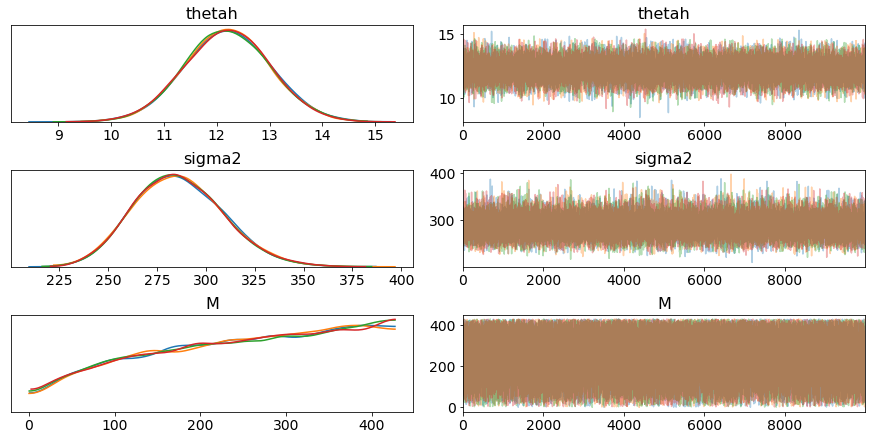

In [22]:
pm.traceplot(trace_UIPJS_nivo)

### UIPDxDOCE

In [23]:
D = dat3.doce
Ds = [dat1.doce, dat2.doce]
UIPD_doce = getUIPDcon(D, Ds)
with UIPD_doce:
    trace_UIPD_doce = pm.sample(10000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetah, M, sigma2, pis]
Sampling 4 chains, 0 divergences: 100%|██████████| 120000/120000 [03:16<00:00, 610.71draws/s]


In [24]:
pm.summary(trace_UIPD_doce)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
thetah,8.819,0.743,7.401,10.206,0.005,0.003,22704.0,22704.0,22813.0,23567.0,1.0
pis[0],0.286,0.208,0.000,0.664,0.001,0.001,19997.0,18973.0,19036.0,17223.0,1.0
pis[1],0.714,0.208,0.336,1.000,0.001,0.001,19997.0,19997.0,19036.0,17223.0,1.0
sigma2,141.628,15.875,111.954,171.080,0.095,0.068,27869.0,27069.0,28492.0,22721.0,1.0
M,220.364,120.725,33.818,426.949,0.712,0.516,28724.0,27418.0,26124.0,20053.0,1.0


In [25]:
np.quantile(trace_UIPD_doce["thetah"], [0.025, 0.975])

array([ 7.32518992, 10.25997282])

### UIPJSxDOCE

In [26]:
D = dat3.doce
Ds = [dat1.doce, dat2.doce]
UIPJS_doce = getUIPJScon(D, Ds)
with UIPJS_doce:
    trace_UIPJS_doce = pm.sample(10000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetah, M, sigma2]
Sampling 4 chains, 0 divergences: 100%|██████████| 120000/120000 [01:30<00:00, 1323.00draws/s]


In [27]:
pm.summary(trace_UIPJS_doce)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
thetah,9.386,0.609,8.230,10.540,0.003,0.002,33807.0,33555.0,34648.0,24704.0,1.0
sigma2,141.085,15.844,112.705,170.893,0.080,0.057,39473.0,38298.0,40313.0,28021.0,1.0
M,238.624,115.945,50.822,426.819,0.601,0.438,37215.0,35002.0,35606.0,27052.0,1.0


In [28]:
np.quantile(trace_UIPJS_doce["thetah"], [0.025, 0.975])

array([ 8.17647128, 10.5990923 ])

## New Model

The model is $Y_i \sim N(\theta+\beta X_i, \sigma^2)$.

Our target is to estimate the $\beta$. 

In [11]:
def DataPre(D):
    D.n = D.nivo.n + D.doce.n
    n, n1, n2 = D.n, D.nivo.n, D.doce.n
    D.nivo.mle = (D.nivo.low + D.nivo.up)/2
    D.doce.mle = (D.doce.low + D.doce.up)/2
    mle1, mle2 = D.nivo.mle, D.doce.mle
    D.nivo.var = CI2Var(D.nivo)
    D.doce.var = CI2Var(D.doce)
    D.betamle = (n*n1*mle1 - n1*(n1*mle1 + n2*mle2))/(n*n1-n1**2)
    D.thetamle = mle2
    D.sigma2mle = (n1*D.nivo.var + n1*(mle1-D.betamle-D.thetamle)**2 + n2*D.doce.var)/n
    D.betaUI = n1/D.sigma2mle/n
    D.thetaUI = 1/D.sigma2mle
    return D

In [12]:
dat1 = DataPre(dat1)
dat2 = DataPre(dat2)
dat3 = DataPre(dat3)
dat4 = DataPre(dat4)
dat5 = DataPre(dat5)

### Raw Model

In [18]:
def GetNewRawModel(D):
    n = D.n
    n1 = D.nivo.n
    n2 = D.doce.n
    model = pm.Model()
    def loglike(mlem1, mlem2, mlev1, mlev2):
        return -n/2 * np.log(sigma2) - (n1*mlev1+ n1*(mlem1-theta-beta)**2 + n2*mlev2+ n2*(mlem2-theta)**2)/2/sigma2
    
    with model:
        theta = pm.Normal("theta", mu=0, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=10)
        sigma2 = pm.InverseGamma("sigma2", alpha=0.01, beta=0.01)
        pm.DensityDist("Distdensity", loglike, observed={"mlem1":[D.nivo.mle], "mlev1":[D.nivo.var], 
                                                         "mlem2":[D.doce.mle], "mlev2":[D.doce.var]})
    return model
        

In [19]:
NewRawModel3 = GetNewRawModel(dat3)
with NewRawModel3:
    step = pm.Metropolis()
    trace_new_raw_3 = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma2]
>Metropolis: [beta]
>Metropolis: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:16<00:00, 3749.37draws/s] 
The number of effective samples is smaller than 10% for some parameters.


In [20]:
NewRawModel1 = GetNewRawModel(dat1)
with NewRawModel1:
    step = pm.Metropolis()
    trace_new_raw_1 = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma2]
>Metropolis: [beta]
>Metropolis: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:23<00:00, 2597.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [21]:
NewRawModel2 = GetNewRawModel(dat2)
with NewRawModel2:
    step = pm.Metropolis()
    trace_new_raw_2 = pm.sample(10000, tune=5000, step=step)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma2]
>Metropolis: [beta]
>Metropolis: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:28<00:00, 2084.13draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [22]:
betas = [trace_new_raw_1["beta"], trace_new_raw_2["beta"], trace_new_raw_3["beta"]]
thetas = [trace_new_raw_1["theta"], trace_new_raw_2["theta"], trace_new_raw_3["theta"]]
sigma2s = [trace_new_raw_1["sigma2"], trace_new_raw_2["sigma2"], trace_new_raw_3["sigma2"]]

In [23]:
NewRawRes = ddict(list)
NewRawRes["data"] = ["dat1", "dat2", "dat3"]
for i in range(3):
    NewRawRes["bmean"].append(betas[i].mean())
    NewRawRes["blow"].append(np.quantile(betas[i], 0.025))
    NewRawRes["bup"].append(np.quantile(betas[i], 0.975))
    NewRawRes["tmean"].append(thetas[i].mean())
    NewRawRes["tlow"].append(np.quantile(thetas[i], 0.025))
    NewRawRes["tup"].append(np.quantile(thetas[i], 0.975))
    NewRawRes["smean"].append(sigma2s[i].mean())
    NewRawRes["slow"].append(np.quantile(sigma2s[i], 0.025))
    NewRawRes["sup"].append(np.quantile(sigma2s[i], 0.975))

In [24]:
ResDf = pd.DataFrame(NewRawRes)

In [25]:
ResDf

,data,bmean,blow,bup,tmean,tlow,tup,smean,slow,sup
0,dat1,4.054579,1.550390,6.580934,6.208079,4.438585,7.982207,114.504211,96.752016,135.963599
1,dat2,3.009342,0.675257,5.355236,9.317671,7.685271,10.952520,211.348166,188.166787,237.275259
2,dat3,2.855026,0.673279,5.144914,9.331353,7.448642,11.128033,151.743299,133.773845,171.824634


### UIPD model

In [13]:
def getNewUIPDcon(D, Ds):
    nD = len(Ds)
    n = D.n
    n1 = D.nivo.n
    n2 = D.doce.n
    
    nsSum = np.sum([Dh.n for Dh in Ds])
    betaMeans = [Dh.betamle for Dh in Ds]
    betaUIs = [Dh.betaUI for Dh in Ds]
    thetaMeans = [Dh.thetamle for Dh in Ds]
    thetaUIs = [Dh.thetaUI for Dh in Ds]
    UIPDm = pm.Model()
    def loglike(mlem1, mlem2, mlev1, mlev2):
        return -n/2 * np.log(sigma2) - (n1*mlev1+ n1*(mlem1-thetah-betah)**2 \
                                        + n2*mlev2+ n2*(mlem2-thetah)**2)/2/sigma2
    with UIPDm:
        pis = pm.Dirichlet("pis", np.ones(nD))
        sigma2 = pm.InverseGamma("sigma2", alpha=0.01, beta=0.01)
        M = pm.Uniform("M", lower=0, upper=nsSum)

        thetan = 0
        betan = 0
        sigma2n_inv = 0
        sigma2betan_inv = 0
        for i in range(nD):
            thetan += pis[i] * thetaMeans[i]
            betan += pis[i] * betaMeans[i]
            sigma2n_inv += pis[i] * thetaUIs[i]
            sigma2betan_inv += pis[i] * betaUIs[i]
        sigma2n = 1/M/sigma2n_inv
        sigma2betan = 1/M/sigma2betan_inv
        thetah = pm.Normal("thetah", mu=thetan, sigma=np.sqrt(sigma2n))
        betah = pm.Normal("betah", mu=betan, sigma=np.sqrt(sigma2betan))
        pm.DensityDist("Distdensity", loglike, observed={"mlem1":[D.nivo.mle], "mlev1":[D.nivo.var], 
                                                         "mlem2":[D.doce.mle], "mlev2":[D.doce.var]})
    return UIPDm

In [21]:
NewModel = getNewUIPDcon(dat3, [dat1, dat2, dat4, dat5])
with NewModel:
    step = pm.Metropolis()
    trace_new_UIPD = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [betah]
>Metropolis: [thetah]
>Metropolis: [M]
>Metropolis: [sigma2]
>Metropolis: [pis]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:08<00:00, 7174.98draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [22]:
np.quantile(trace_new_UIPD["thetah"], [0.025, 0.975])

array([7.68326933, 9.59011678])

In [23]:
np.quantile(trace_new_UIPD["betah"], [0.025, 0.975])

array([2.27921906, 4.6544263 ])

In [24]:
np.quantile(trace_new_UIPD["M"], [0.025, 0.975])

array([ 136.07907546, 2177.60153601])

In [25]:
np.quantile(trace_new_UIPD["pis"], [0.025, 0.975], axis=0)

array([[0.00495176, 0.01527181, 0.01138523, 0.01091481],
       [0.47930925, 0.76502349, 0.68195356, 0.68346028]])

In [26]:
pm.summary(trace_new_UIPD)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
thetah,8.649,0.478,7.711,9.515,0.011,0.008,1951.0,1951.0,1937.0,3208.0,1.0
betah,3.459,0.605,2.321,4.584,0.014,0.010,1990.0,1969.0,1990.0,4545.0,1.0
pis[0],0.161,0.131,0.000,0.396,0.003,0.002,1877.0,1877.0,1727.0,2447.0,1.0
pis[1],0.318,0.209,0.000,0.676,0.005,0.003,1935.0,1935.0,1810.0,2563.0,1.0
pis[2],0.256,0.185,0.000,0.591,0.004,0.003,1794.0,1794.0,1716.0,2536.0,1.0
pis[3],0.265,0.187,0.000,0.596,0.004,0.003,1819.0,1819.0,1717.0,2869.0,1.0
sigma2,151.511,9.461,134.061,169.646,0.108,0.076,7702.0,7689.0,7734.0,7912.0,1.0
M,1222.709,605.225,247.630,2230.236,7.917,5.599,5844.0,5844.0,5710.0,4959.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4644bfcf8>,
      dtype=object)

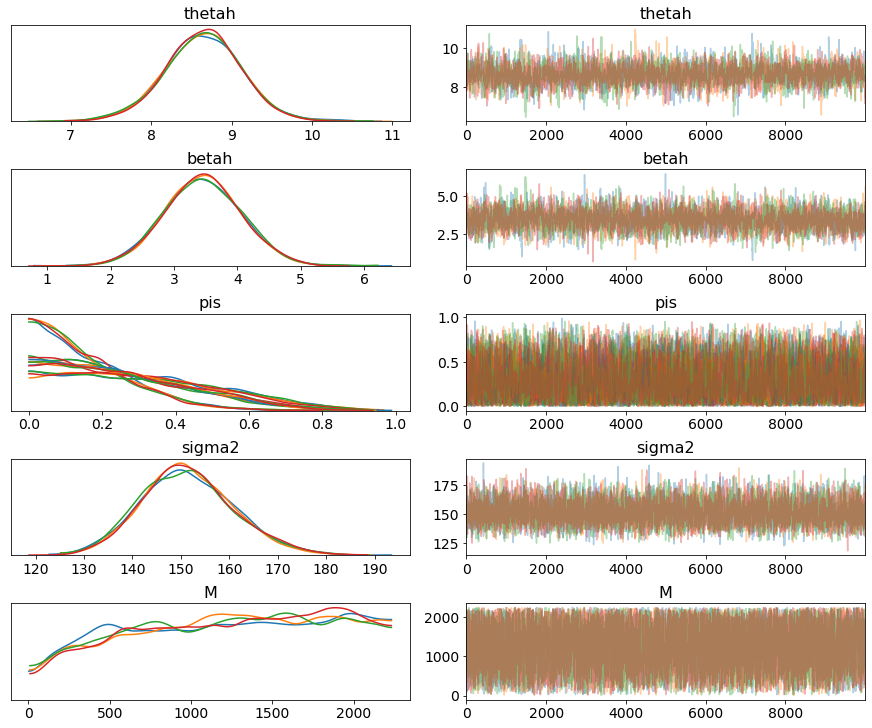

In [27]:
pm.traceplot(trace_new_UIPD)


### UIPD-with less related dataset

In [13]:
NewModel3 = getNewUIPDcon(dat3, [dat1, dat2, dat4])
with NewModel3:
    step = pm.Metropolis()
    trace_new_UIPD3 = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [betah]
>Metropolis: [thetah]
>Metropolis: [M]
>Metropolis: [sigma2]
>Metropolis: [pis]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:47<00:00, 1266.56draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [14]:
pm.summary(trace_new_UIPD3)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
thetah,8.707,0.652,7.335,9.830,0.014,0.010,2160.0,2160.0,2206.0,2838.0,1.0
betah,3.130,0.713,1.839,4.541,0.013,0.009,3244.0,3214.0,3272.0,5224.0,1.0
pis[0],0.229,0.184,0.000,0.575,0.004,0.003,2013.0,2006.0,2106.0,2806.0,1.0
pis[1],0.445,0.243,0.000,0.828,0.005,0.003,2686.0,2686.0,2612.0,3669.0,1.0
pis[2],0.327,0.232,0.000,0.745,0.004,0.003,3103.0,3103.0,2805.0,3310.0,1.0
sigma2,238.317,14.992,211.814,267.431,0.181,0.128,6887.0,6853.0,6931.0,7893.0,1.0
M,831.421,420.511,169.994,1538.825,5.750,4.066,5348.0,5348.0,5213.0,6309.0,1.0


In [17]:
NewModel4 = getNewUIPDcon(dat3, [dat1, dat2, dat5])
with NewModel4:
    step = pm.Metropolis()
    trace_new_UIPD4 = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [betah]
>Metropolis: [thetah]
>Metropolis: [M]
>Metropolis: [sigma2]
>Metropolis: [pis]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:52<00:00, 1140.68draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [18]:
pm.summary(trace_new_UIPD4)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
thetah,8.551,0.698,7.187,9.800,0.014,0.010,2458.0,2450.0,2473.0,4237.0,1.0
betah,3.743,0.819,2.203,5.247,0.015,0.011,2835.0,2835.0,2896.0,4308.0,1.0
pis[0],0.251,0.183,0.000,0.581,0.003,0.002,2993.0,2993.0,2856.0,4804.0,1.0
pis[1],0.414,0.243,0.000,0.812,0.005,0.003,2462.0,2462.0,2403.0,3708.0,1.0
pis[2],0.335,0.227,0.000,0.733,0.004,0.003,3058.0,3058.0,2834.0,3822.0,1.0
sigma2,237.919,14.840,210.412,265.538,0.176,0.124,7133.0,7133.0,7096.0,7679.0,1.0
M,891.263,409.315,207.188,1539.729,5.299,3.747,5966.0,5966.0,5794.0,5638.0,1.0
